In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from tqdm import tqdm

In [10]:
rnd = np.random.RandomState(43)

In [11]:
colors = cm.Set1(np.linspace(0, 1, 9))

In [14]:
def get_new_psi_deltaE_NEW(E_mu, E_mu_prime, m_e, m_mu, is_degree=True):
    # m_e = 0.511
    # m_mu = 105.658
    assert E_mu > m_mu, 'incoming energy lower than muon mass'
    
    gamma = E_mu / m_mu
    epsilon_max = 2 * m_e * (gamma**2 - 1) / (1 + 2*gamma*m_e/m_mu + (m_e/m_mu)**2) 
    assert E_mu_prime > E_mu - epsilon_max
    
    p_mu = np.sqrt((E_mu + m_mu) * (E_mu - m_mu))
    p_mu_prime = np.sqrt((E_mu_prime + m_mu) * (E_mu_prime - m_mu))
    
    cos_theta = ((E_mu + m_e) * E_mu_prime - E_mu*m_e - m_mu**2) / (p_mu * p_mu_prime)
    theta_mu = np.arccos(cos_theta)
    if is_degree:
        return np.rad2deg(theta_mu)
    else:
        return theta_mu
    
def get_nu_max(E_mu):
    # Energy in MeV
    # v_max = 1 - nu_max = 1 - E_f / E_i
    m_e = 0.511 # const.m_e * const.c**2 / const.e / 1e6
    m_mu = 105.658# 1.883531627e-28 * const.c**2 / const.e / 1e6

    gamma = E_mu / m_mu
    nu_max = 1 - 2 * m_e * (gamma**2 - 1) / (1 + 2 * gamma * m_e/m_mu + (m_e/m_mu)**2)  / E_mu
    return nu_max

9848.00535675927
0.9024734852562473


100%|██████████| 9910868/9910868 [00:24<00:00, 412823.74it/s]


E_i = 100000.0 --> E_f > 9847.924012153775
10805.630120196263
0.9892988975942075


100%|██████████| 9990655/9990655 [00:24<00:00, 415748.20it/s]


E_i = 1000000.0 --> E_f > 10805.532185394706
10922.46292155981
0.9998918318402507


100%|██████████| 9999906/9999906 [00:24<00:00, 414221.43it/s]


E_i = 100000000.0 --> E_f > 10922.362857390677


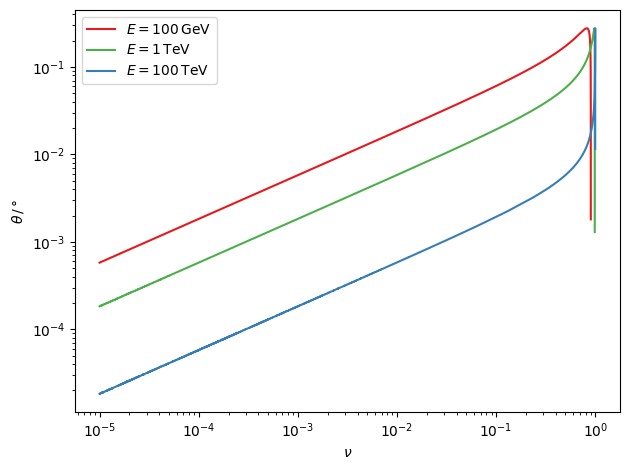

In [16]:
nu = np.logspace(-5, 0, 10000000) # 10000000


m_mu = 105.6583755
m_e = 0.51099895
E = 1e5 # in MeV
E_ = E - nu * (E - m_mu)
gamma = E / m_mu
epsilon_max = 2 * m_e * (gamma**2 - 1) / (1 + 2*gamma*m_e/m_mu + (m_e/m_mu)**2) 
E_cut = E_[E_ >= (E - epsilon_max)]
print(E - epsilon_max)
print(epsilon_max / (E - m_mu))
thetas = [get_new_psi_deltaE_NEW(E, E__, m_e, m_mu) for E__ in tqdm(E_cut)]
plt.plot(nu[E_ >= (E - epsilon_max)], thetas, '-', color=colors[0], label=r'$E = 100\,$GeV')
print('E_i = {} --> E_f > {}'.format(E, get_nu_max(E)*E))



E = 1e6 # in MeV
E_ = E - nu * (E - m_mu)
gamma = E / m_mu
epsilon_max = 2 * m_e * (gamma**2 - 1) / (1 + 2*gamma*m_e/m_mu + (m_e/m_mu)**2) 
E_cut = E_[E_ >= (E - epsilon_max)]
print(E - epsilon_max)
print(epsilon_max / (E - m_mu))
thetas = [get_new_psi_deltaE_NEW(E, E__, m_e, m_mu) for E__ in tqdm(E_cut)]
plt.plot(nu[E_ >= (E - epsilon_max)], thetas, '-', color=colors[2], label=r'$E = 1\,$TeV')
print('E_i = {} --> E_f > {}'.format(E, get_nu_max(E)*E))



E = 1e8 # in MeV
E_ = E - nu * (E - m_mu)
gamma = E / m_mu
epsilon_max = 2 * m_e * (gamma**2 - 1) / (1 + 2*gamma*m_e/m_mu + (m_e/m_mu)**2) 
E_cut = E_[E_ >= (E - epsilon_max)]
print(E - epsilon_max)
print(epsilon_max / (E - m_mu))
thetas = [get_new_psi_deltaE_NEW(E, E__, m_e, m_mu) for E__ in tqdm(E_cut)]
plt.plot(nu[E_ >= (E - epsilon_max)], thetas, '-', color=colors[1], label=r'$E = 100\,$TeV')
print('E_i = {} --> E_f > {}'.format(E, get_nu_max(E)*E))


plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$\nu$')
plt.ylabel(r'$\theta\,/\,$°')
plt.legend()
plt.tight_layout()
# plt.savefig('ioniz_plots/ioniz_thetas_100GeV_100TeV_NEW.pdf')